# Integrazione Numerica

## Integrazione Numerica

**Consideriamo il seguente integrale definito generico:**

$$
\int_{a}^{b} f(x)\, dx
$$

* Nel corso di analisi avete imparato a risolverlo per via simbolica
* ...Cosa che in alcuni casi può essere piuttosto complessa

**In questo corso, vedremo come _approssimare il valore_ dell'integrale**

...Facendo uso di metodi numerici

* Il risultato non sarà una formula, calcolabile per estremi qualunque
* ...Ma un numero, valido solo per questo specifico caso

Il vantaggio è che il procedimento è più _semplice e generale_

## Integrazione Numerica

**Potremmo procedere come visto per la differenziazione**

* In particolare, possiamo rimpiazzare $dx$ con un valore finito $h$
* ...E rimpiazzare $\int$ con una somma

**In pratica, di solito si stabilisce quanti elementi sommare**

...E si ottiene il valore di $h$ di conseguenza

$$
\sum_{i=0}^{n-2} h f(x_i)
$$

Dove $h = (b-a)/n$ e $x_i = a + i h$

* Si noti che la somma si interrompe per $i = n-1$
* Il perché risulta più chiaro guardando un esempio

## Un Esempio

**Vediamo un esempio del procedimento**

Supponiamo di voler calcolare l'integrale seguente

$$
\int_{-\pi}^{\frac{\pi}{2}} x^2 \sin(x) \, dx
$$

**Per prima cosa, definiamo la funzione da integrare**

In [22]:
import numpy as np

def f(x):
    return x**2 * np.sin(x)

* Per la definizione utilizziamo il modulo `numpy`
* ...Così che possa funzionare anche se `x` è un array

## Un Esempio

**Quindi, disegnamo una interpolazione a grana molto fina**

...Che ci svolgerà visivamente il ruolo della vera $f(x)$

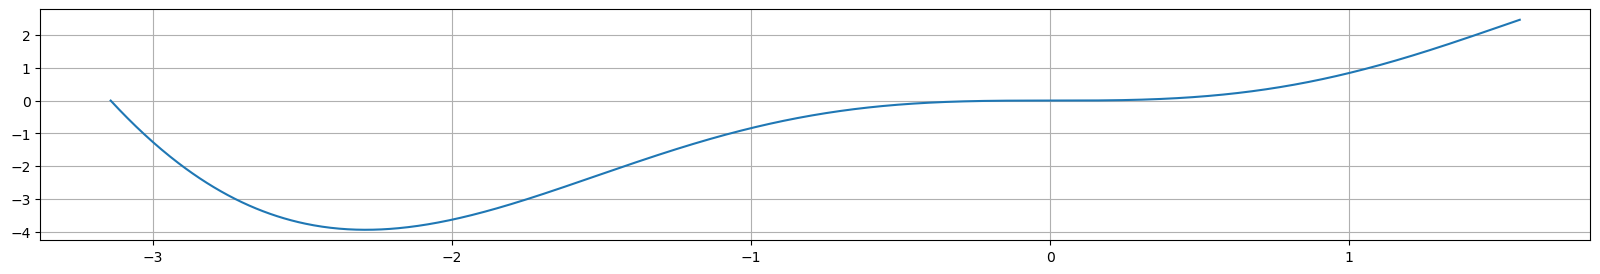

In [23]:
from matplotlib import pyplot as plt

x_c = np.linspace(-np.pi, 0.5*np.pi, 1000)

plt.figure(figsize=(20, 3))
plt.plot(x_c, f(x_c), label='f(x)')
plt.grid()
plt.show()

## Un Esempio

**L'area calcolata dalla nostra formula**

...Corrisponde a quella di $n-1$ rettangoli, ottenuti valutando $f$

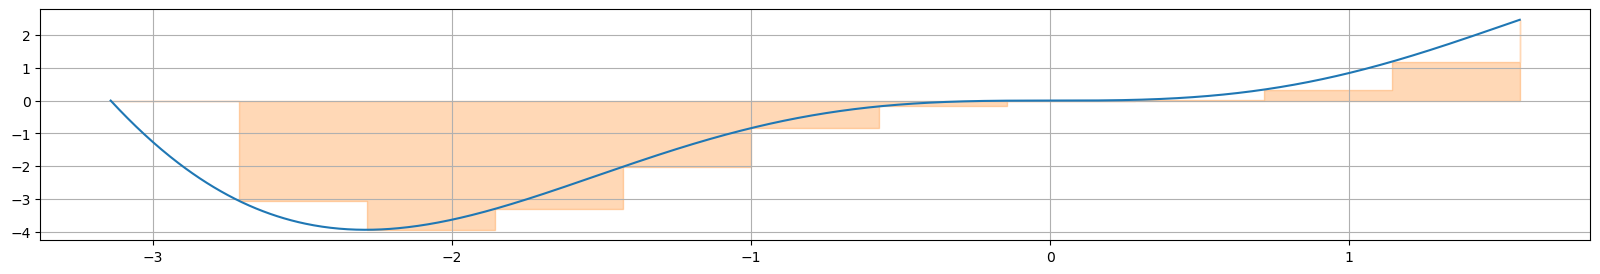

In [24]:
n = 12
x_d = np.linspace(-np.pi, 0.5*np.pi, n)
plt.figure(figsize=(20, 3))
plt.plot(x_c, f(x_c), label='f(x)')
plt.fill_between(x_d, np.zeros(x_d.shape), f(x_d), label='f(x_i)', step='post', color='tab:orange', alpha=0.3)
plt.grid()
plt.show()

* Si noti come sommare l'$n$-mo rettangolo causerebbe un errore

## Un Esempio

**L'intero calcolo può essere effettuato in modo molto compatto**

...Utilizzando il calcolo vettoriale di `numpy`

In [25]:
n = 12
x_d = np.linspace(-np.pi, 0.5*np.pi, n)
F = np.sum(f(x_c)[:-1] * (x_c[1:] - x_c[0:-1]))
print(f"Il valore approssimato dell' 'integrale è {F}")

Il valore approssimato dell' 'integrale è -4.733807117754814


* `x_d` contiene i valori di $f(x_i)$
* `f(x_c)[:-1]` contiene le altezze degli $n-1$ rettangoli
* `x_c[1:]` contiene i valori finali di $x$ per ogni rettangolo
* `x_c[:-1]` contiene i valori inziali di $x$ per ogni rettangolo

## Metodo dei Trapezi

**In alcuni casi, si possono ottenre risultati più accurati**

...Utilizzando dei _trapezi_ anziché dei rettangoli

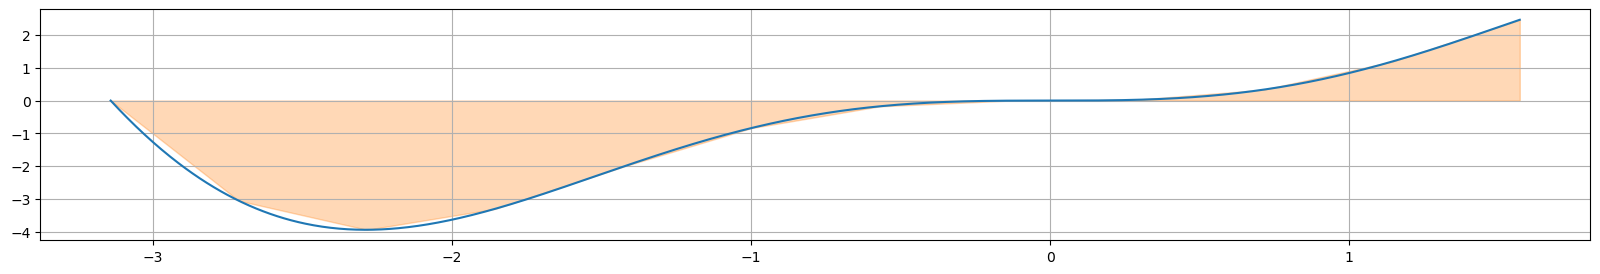

In [26]:
n = 12
x_d = np.linspace(-np.pi, 0.5*np.pi, n)
plt.figure(figsize=(20, 3))
plt.plot(x_c, f(x_c), label='f(x)')
plt.fill_between(x_d, np.zeros(x_d.shape), f(x_d), label='f(x_i)', color='tab:orange', alpha=0.3)
plt.grid()
plt.show()

## Metodo dei Trapezi

**L'algoritmo di integrazione risultante è noto come [metodo dei trapezi](https://en.wikipedia.org/wiki/Trapezoidal_rule)**

* In `numpy` è disponibile attraverso la funzione `trapz(y, x)`


In [27]:
n = 12
x_d = np.linspace(-np.pi, 0.5*np.pi, n)
F2 = np.trapz(y=f(x_d), x=x_d)
print(f"Il valore approssimato dell' 'integrale è {F} (rettangoli)")
print(f"Il valore approssimato dell' 'integrale è {F2} (trapezi)")

Il valore approssimato dell' 'integrale è -4.733807117754814 (rettangoli)
Il valore approssimato dell' 'integrale è -4.528397948530792 (trapezi)


* Iniziamo stabilendo il valore di $n$
* Quindi otteniamo i valori discreti $x_i$ (con `linspace`)
* ...Infine, effettuiamo una chiamata a `trapz`

## Metodo dei Trapezi

**Qualche commento**

* Al crescere di $n$, i risultati dei due metodi tendono a coincidere
* ...Ma _non è detto_ che il metodo dei trapezi sia il più accurato

In alcuni casi (incluso questo) il metodo precendente è migliore!

**Come facciamo a decidere quale metodo usare?**

* Opzione 1: usiamo un valore di $n$ piuttosto alto
* Opzione 2: usiamo un metodo più sofisticato
  - Come le [formule di Newton-Cotes](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas#:~:text=In%20numerical%20analysis%2C%20the%20Newton,integrand%20at%20equally%20spaced%20points.)
  - ...o [metodi ancora più complessi](https://en.wikipedia.org/wiki/Numerical_integration)
  
Fortunatamente, non è necessario che siamo noi ad implementarli

## Metodi di Integrazione in `scipy`

**Diversi metodi di integrazione sono disponibili nel [pacchetto `scipy`](https://scipy.org/)**

Si tratta di un pacchetto Python dedicato al calcolo scientifico

* Mentre `numpy` è focalizzato al calcolo vettoriale
* `scipy` ha come fornisce una vasta gamma di _algoritmi_
* ...Per risolvere problemi di _calcolo numerico_

> **`scipy` (con `numpy`) sarà _uno dei pacchetti più usati_ nel corso**

**Come tutti i pacchetti complessi, `scipy` contiene diversi moduli**

* I metodi di integrazione sono forniti nel [modulo `scipy.integrate`](https://docs.scipy.org/doc/scipy/tutorial/integrate.html)
* Ce ne sono diverse, ma noi ne useremo solamente una

## Metodi di Integrazione in `scipy`

**In particolare, useremo la funzione `scipy.interate.quad`**

```python
def quad(func, a, b, ...)
```

La modalità di utilizzo è diversa da quella di `trapz`

* `trapz` richiede in ingresso dei vettori (`numpy` array)
* ...Mentre `quad` richiede come argomento _una funzione_, i.e. `func`

Anche `quad` si basa su una discretizzazione

* ...Ma tale passo è gestito dall'algoritmo stesso
* Quindi non c'è bisogno di decidere a priori il numero di passi

## Metodi di Integrazione in `scipy`

**Vediamo come utilizzare la funzione**

In [28]:
from scipy import integrate

F3, error_ub = integrate.quad(f, -np.pi, 0.5*np.pi)

print(f"Il valore approssimato dell' 'integrale è {F} (rettangoli)")
print(f"Il valore approssimato dell' 'integrale è {F2} (trapezi)")
print(f"Il valore approssimato dell' 'integrale è {F3} (quad)")
print(f"L'errore effettuato da quad è non superiore a {error_ub}")

Il valore approssimato dell' 'integrale è -4.733807117754814 (rettangoli)
Il valore approssimato dell' 'integrale è -4.528397948530792 (trapezi)
Il valore approssimato dell' 'integrale è -4.728011747499566 (quad)
L'errore effettuato da quad è non superiore a 7.783966459864315e-14


`quad` restituisce una tupla:

* Il primo elemento è il valore (approssimato) dell'integrale
* Il secondo è un limite superiore (upper bound) sull'errore